<a href="https://colab.research.google.com/github/bhkpriyanka/EVA4/blob/master/Week7/Approach1/S7Step1_GPU%2BC1C2C3C4OArch%2BRF%3E44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [0]:
#print(torch.cuda.is_available())
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
print("CUDA current device:", torch.cuda.current_device())
print("CUDA device name:", torch.cuda.get_device_name(0)) 

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True
CUDA current device: 0
CUDA device name: Tesla T4


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])
64
plane   dog  deer  deer


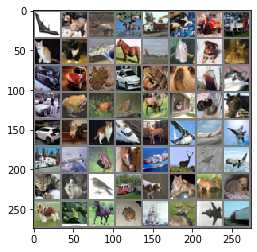

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images[0].shape)
print(len(images))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [0]:
'''import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()'''

'import torch.nn as nn\nimport torch.nn.functional as F\n\n\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.conv1 = nn.Conv2d(3, 6, 5)\n        self.pool = nn.MaxPool2d(2, 2)\n        self.conv2 = nn.Conv2d(6, 16, 5)\n        self.fc1 = nn.Linear(16 * 5 * 5, 120)\n        self.fc2 = nn.Linear(120, 84)\n        self.fc3 = nn.Linear(84, 10)\n\n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))\n        x = self.pool(F.relu(self.conv2(x)))\n        x = x.view(-1, 16 * 5 * 5)\n        x = F.relu(self.fc1(x))\n        x = F.relu(self.fc2(x))\n        x = self.fc3(x)\n        return x\n\n\nnet = Net()'

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 32

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 32
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 32

        # TRANSITION BLOCK 1
        self.conv1x1_1 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 32
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 16

         # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 16
        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 16
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 16


        # TRANSITION BLOCK 2
        self.conv1x1_2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 16
        self.pool2 = nn.MaxPool2d(2, 2) # output_size = 8

        # CONVOLUTION BLOCK 3
        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 8
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 8
        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU()
            #nn.Dropout(0.01)
        ) # output_size = 8


        # TRANSITION BLOCK 3
        self.conv1x1_3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(1, 1), padding=0, bias=False),
        ) # output_size = 8
        self.pool3 = nn.MaxPool2d(2, 2) # output_size = 4

         # CONVOLUTION BLOCK 4
        self.convblock10 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            #nn.Dropout(0.01)
        ) # output_size = 4

               
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        ) # output_size = 1

        self.fcn = nn.Sequential(
            #nn.Linear(in_features=64, out_features=10, bias=False)
            nn.Conv2d(in_channels=64, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            
        ) 

        
    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.conv1x1_1(x)
        x = self.pool1(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.conv1x1_2(x)
        x = self.pool2(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.convblock9(x)
        x = self.conv1x1_3(x)
        x = self.pool3(x)
        x = self.convblock10(x)
        #x = self.convblock11(x)
        
        x = self.gap(x)  

        x = self.fcn(x)

        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

In [0]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          18,432
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,728
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
           Conv2d-10           [-1, 16, 32, 32]           2,048
        MaxPool2d-11           [-1, 16, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           4,608
      BatchNorm2d-13           [-1, 32, 16, 16]              64
             ReLU-14           [-1

In [0]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [0]:
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

EPOCHS = 10
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, trainloader, optimizer, epoch)
    test(model, device, testloader)
    #scheduler.step()
    print('')

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0726819038391113 Batch_id=781 Accuracy=43.41: 100%|██████████| 782/782 [00:20<00:00, 38.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2584, Accuracy: 5468/10000 (54.68%)


EPOCH: 2


Loss=1.2036470174789429 Batch_id=781 Accuracy=62.17: 100%|██████████| 782/782 [00:20<00:00, 38.97it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0305, Accuracy: 6345/10000 (63.45%)


EPOCH: 3


Loss=0.7386047840118408 Batch_id=781 Accuracy=70.20: 100%|██████████| 782/782 [00:19<00:00, 39.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8538, Accuracy: 7037/10000 (70.37%)


EPOCH: 4


Loss=0.41830167174339294 Batch_id=781 Accuracy=75.18: 100%|██████████| 782/782 [00:19<00:00, 39.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7679, Accuracy: 7385/10000 (73.85%)


EPOCH: 5


Loss=0.44068247079849243 Batch_id=781 Accuracy=77.80: 100%|██████████| 782/782 [00:20<00:00, 38.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7357, Accuracy: 7471/10000 (74.71%)


EPOCH: 6


Loss=1.0068883895874023 Batch_id=781 Accuracy=80.25: 100%|██████████| 782/782 [00:19<00:00, 39.21it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7208, Accuracy: 7618/10000 (76.18%)


EPOCH: 7


Loss=0.8716267347335815 Batch_id=781 Accuracy=82.02: 100%|██████████| 782/782 [00:20<00:00, 38.83it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6735, Accuracy: 7742/10000 (77.42%)


EPOCH: 8


Loss=0.37572893500328064 Batch_id=781 Accuracy=83.74: 100%|██████████| 782/782 [00:20<00:00, 40.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7314, Accuracy: 7620/10000 (76.20%)


EPOCH: 9


Loss=0.395250141620636 Batch_id=781 Accuracy=84.91: 100%|██████████| 782/782 [00:20<00:00, 41.85it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6288, Accuracy: 7959/10000 (79.59%)


EPOCH: 10


Loss=0.3686211407184601 Batch_id=781 Accuracy=86.15: 100%|██████████| 782/782 [00:19<00:00, 39.18it/s]



Test set: Average loss: 0.6063, Accuracy: 8063/10000 (80.63%)




Text(0.5, 1.0, 'Test Accuracy')

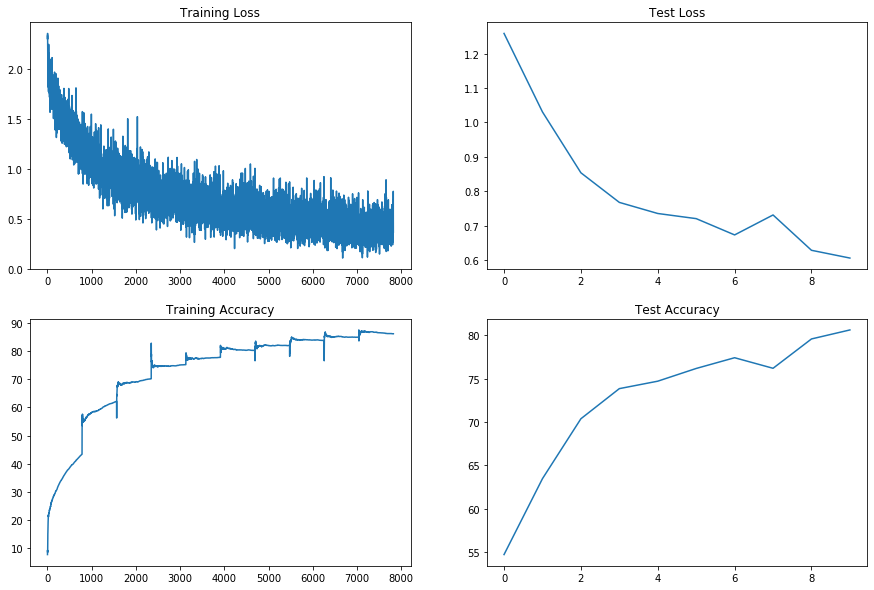

In [0]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")